In [1]:
# 全ての実験を踏まえた学習

In [2]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from scipy import signal

In [3]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
size_x_data_list1 = []
size_x_data_list2 = []
size_x_data_list3 = []
y_size_data_array = []
no_hole_data1 = []
one_one_one1 = []
one_two_two1 = []
one_three_three1 = []
one_four_four1 = []
one_five_five1 = []
two_one_two1 = []
two_two_three1 = []
two_three_four1 = []
two_four_five1 = []
two_five_one1 = []
three_one_three1 = []
three_two_four1 = []
three_three_five1 = []
three_four_one1 = []
three_five_two1 = []
four_one_four1 = []
four_two_five1 = []
four_three_one1 = []
four_four_two1 = []
four_five_three1 = []
five_one_five1 = []
five_two_one1 = []
five_three_two1 = []
five_four_three1 = []
five_five_four1 = []
no_hole_data2 = []
one_one_one2 = []
one_two_two2 = []
one_three_three2 = []
one_four_four2 = []
one_five_five2 = []
two_one_two2 = []
two_two_three2 = []
two_three_four2 = []
two_four_five2 = []
two_five_one2 = []
three_one_three2 = []
three_two_four2 = []
three_three_five2 = []
three_four_one2 = []
three_five_two2 = []
four_one_four2 = []
four_two_five2 = []
four_three_one2 = []
four_four_two2 = []
four_five_three2 = []
five_one_five2 = []
five_two_one2 = []
five_three_two2 = []
five_four_three2 = []
five_five_four2 = []
no_hole_data3 = []
one_one_one3 = []
one_two_two3 = []
one_three_three3 = []
one_four_four3 = []
one_five_five3 = []
two_one_two3 = []
two_two_three3 = []
two_three_four3 = []
two_four_five3 = []
two_five_one3 = []
three_one_three3 = []
three_two_four3 = []
three_three_five3 = []
three_four_one3 = []
three_five_two3 = []
four_one_four3 = []
four_two_five3 = []
four_three_one3 = []
four_four_two3 = []
four_five_three3 = []
five_one_five3 = []
five_two_one3 = []
five_three_two3 = []
five_four_three3 = []
five_five_four3 = []
rep_freq_array1 = []
rep_freq_array2 = []
rep_freq_array3 = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]

#### データ分類
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 0 < position[1] and position[1] < 10):
        one_one_one1.append(data_array[3:1254])
        one_one_one2.append(data_array[1254:2505])
        one_one_one3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 10 < position[1] and position[1] < 20):
        one_two_two1.append(data_array[3:1254])
        one_two_two2.append(data_array[1254:2505])
        one_two_two3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 20 < position[1] and position[1] < 30):
        one_three_three1.append(data_array[3:1254])
        one_three_three2.append(data_array[1254:2505])
        one_three_three3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 30 < position[1] and position[1] < 40):
        one_four_four1.append(data_array[3:1254])
        one_four_four2.append(data_array[1254:2505])
        one_four_four3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 40 < position[1] and position[1] < 50):
        one_five_five1.append(data_array[3:1254])
        one_five_five2.append(data_array[1254:2505])
        one_five_five3.append(data_array[2505:-1])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 10 < position[1] and position[1] < 20):
        two_one_two1.append(data_array[3:1254])
        two_one_two2.append(data_array[1254:2505])
        two_one_two3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 20 < position[1] and position[1] < 30):
        two_two_three1.append(data_array[3:1254])
        two_two_three2.append(data_array[1254:2505])
        two_two_three3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 30 < position[1] and position[1] < 40):
        two_three_four1.append(data_array[3:1254])
        two_three_four2.append(data_array[1254:2505])
        two_three_four3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 40 < position[1] and position[1] < 50):
        two_four_five1.append(data_array[3:1254])
        two_four_five2.append(data_array[1254:2505])
        two_four_five3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 0 < position[1] and position[1] < 10):
        two_five_one1.append(data_array[3:1254])
        two_five_one2.append(data_array[1254:2505])
        two_five_one3.append(data_array[2505:-1])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 20 < position[1] and position[1] < 30):
        three_one_three1.append(data_array[3:1254])
        three_one_three2.append(data_array[1254:2505])
        three_one_three3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 30 < position[1] and position[1] < 40):
        three_two_four1.append(data_array[3:1254])
        three_two_four2.append(data_array[1254:2505])
        three_two_four3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 40 < position[1] and position[1] < 50):
        three_three_five1.append(data_array[3:1254])
        three_three_five2.append(data_array[1254:2505])
        three_three_five3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 0 < position[1] and position[1] < 10):
        three_four_one1.append(data_array[3:1254])
        three_four_one2.append(data_array[1254:2505])
        three_four_one3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 10 < position[1] and position[1] < 20):
        three_five_two1.append(data_array[3:1254])
        three_five_two2.append(data_array[1254:2505])
        three_five_two3.append(data_array[2505:-1])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 30 < position[1] and position[1] < 40):
        four_one_four1.append(data_array[3:1254])
        four_one_four2.append(data_array[1254:2505])
        four_one_four3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 40 < position[1] and position[1] < 50):
        four_two_five1.append(data_array[3:1254])
        four_two_five2.append(data_array[1254:2505])
        four_two_five3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 0 < position[1] and position[1] < 10):
        four_three_one1.append(data_array[3:1254])
        four_three_one2.append(data_array[1254:2505])
        four_three_one3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 10 < position[1] and position[1] < 20):
        four_four_two1.append(data_array[3:1254])
        four_four_two2.append(data_array[1254:2505])
        four_four_two3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 20 < position[1] and position[1] < 30):
        four_five_three1.append(data_array[3:1254])
        four_five_three2.append(data_array[1254:2505])
        four_five_three3.append(data_array[2505:-1])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 40 < position[1] and position[1] < 50):
        five_one_five1.append(data_array[3:1254])
        five_one_five2.append(data_array[1254:2505])
        five_one_five3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 0 < position[1] and position[1] < 10):
        five_two_one1.append(data_array[3:1254])
        five_two_one2.append(data_array[1254:2505])
        five_two_one3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 10 < position[1] and position[1] < 20):
        five_three_two1.append(data_array[3:1254])
        five_three_two2.append(data_array[1254:2505])
        five_three_two3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 20 < position[1] and position[1] < 30):
        five_four_three1.append(data_array[3:1254])
        five_four_three2.append(data_array[1254:2505])
        five_four_three3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 30 < position[1] and position[1] < 40):
        five_five_four1.append(data_array[3:1254])
        five_five_four2.append(data_array[1254:2505])
        five_five_four3.append(data_array[2505:-1])
### 利用データの決定
for j in range(1):
    size_x_data1 = []
    size_x_data2 = []
    size_x_data3 = []
    size_y_data = []
#     position_x_data = []
#     position_y_data = []
    #### one_one_oneについて
    index = []
    for i in range(len(one_one_one1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_one_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_one_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_one_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_two_twoについて
    index = []
    for i in range(len(one_two_two1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_two_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_two_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_two_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_three_threeについて
    index = []
    for i in range(len(one_three_three1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_three_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_three_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_three_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_four_fourについて
    index = []
    for i in range(len(one_four_four1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_four_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_four_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_four_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_five_fiveについて
    index = []
    for i in range(len(one_five_five1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_five_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_five_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_five_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### two_one_twoについて
    index = []
    for i in range(len(two_one_two1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_one_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_one_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_one_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_two_threeについて
    index = []
    for i in range(len(two_two_three1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_two_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_two_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_two_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_three_fourについて
    index = []
    for i in range(len(two_three_four1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_three_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_three_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_three_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_four_fiveについて
    index = []
    for i in range(len(two_four_five1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_four_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_four_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_four_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_five_oneについて
    index = []
    for i in range(len(two_five_one1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_five_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_five_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_five_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### three_one_threeについて
    index = []
    for i in range(len(three_one_three1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_one_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_one_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_one_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_two_fourについて
    index = []
    for i in range(len(three_two_four1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_two_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_two_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_two_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_three_fiveについて
    index = []
    for i in range(len(three_three_five1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_three_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_three_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_three_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_four_oneについて
    index = []
    for i in range(len(three_four_one1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_four_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_four_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_four_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_five_twoについて
    index = []
    for i in range(len(three_five_two1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_five_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_five_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_five_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### four_one_fourについて
    index = []
    for i in range(len(four_one_four1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_one_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_one_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_one_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_two_fiveについて
    index = []
    for i in range(len(four_two_five1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_two_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_two_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_two_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_three_oneについて
    index = []
    for i in range(len(four_three_one1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_three_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_three_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_three_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_four_twoについて
    index = []
    for i in range(len(four_four_two1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_four_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_four_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_four_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_five_threeについて
    index = []
    for i in range(len(four_five_three1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_five_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_five_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_five_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### five_one_fiveについて
    index = []
    for i in range(len(five_one_five1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_one_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_one_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_one_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_two_oneについて
    index = []
    for i in range(len(five_two_one1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_two_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_two_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_two_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_three_twoについて
    index = []
    for i in range(len(five_three_two1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_three_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_three_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_three_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_four_threeについて
    index = []
    for i in range(len(five_four_three1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_four_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_four_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_four_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_five_fourについて
    index = []
    for i in range(len(five_five_four1)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_five_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_five_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_five_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)

    ### 各配列をnp.array型にして各要素を型変換
    no_hole_data1 = np.array(no_hole_data1, dtype=float)
    no_hole_data2 = np.array(no_hole_data2, dtype=float)
    no_hole_data3 = np.array(no_hole_data3, dtype=float)
    size_x_data1 = np.array(size_x_data1, dtype=float)
    size_x_data2 = np.array(size_x_data2, dtype=float)
    size_x_data3 = np.array(size_x_data3, dtype=float)
    size_y_data = np.array(size_y_data, dtype=float)
    
    size_x_data_list1.append(size_x_data1)
    size_x_data_list2.append(size_x_data2)
    size_x_data_list3.append(size_x_data3)
    y_size_data_array.append(size_y_data)

#各振動を高速フーリエ変換→代表周波数のリスト作成→該当周波数のみの振幅を入力とする
## 欠陥なしデータ
F_no_hole1 = np.fft.fft(no_hole_data1)
N = len(no_hole_data1)
Amp_no_hole1 = np.abs(F_no_hole1/(N/2))
maxid_no_hole1 = signal.argrelmax(Amp_no_hole1[1:int(N/2)], order=1)
rep_index_no_hole1 = maxid_no_hole1[0]
for i in range(len(rep_index_no_hole1)):
    if (rep_index_no_hole1[i] in rep_freq_array1) == False:
        rep_freq_array1.append(rep_index_no_hole1[i])
F_no_hole2 = np.fft.fft(no_hole_data2)
Amp_no_hole2 = np.abs(F_no_hole2/(N/2))
maxid_no_hole2 = signal.argrelmax(Amp_no_hole2[1:int(N/2)], order=1)
rep_index_no_hole2 = maxid_no_hole2[0]
for i in range(len(rep_index_no_hole2)):
    if (rep_index_no_hole2[i] in rep_freq_array2) == False:
        rep_freq_array2.append(rep_index_no_hole2[i])
F_no_hole3 = np.fft.fft(no_hole_data3)
Amp_no_hole3 = np.abs(F_no_hole3/(N/2))
maxid_no_hole3 = signal.argrelmax(Amp_no_hole3[1:int(N/2)], order=1)
rep_index_no_hole3 = maxid_no_hole3[0]
for i in range(len(rep_index_no_hole3)):
    if (rep_index_no_hole3[i] in rep_freq_array3) == False:
        rep_freq_array3.append(rep_index_no_hole3[i])
# 欠陥ありデータ
N = len(no_hole_data1)
fft_size_x_data_array1 = []
fft_size_x_data_array2 = []
fft_size_x_data_array3 = []
for i in range(len(size_x_data_list1)):
    fft_size_x_data1 = []
    fft_size_x_data2 = []
    fft_size_x_data3 = []
    size_x_data1 = size_x_data_list1[i]
    size_x_data2 = size_x_data_list2[i]
    size_x_data3 = size_x_data_list3[i]
    ### 観測点1
    for j in range(len(size_x_data1)):
        F = np.fft.fft(size_x_data1[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data1.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array1) == False:
                rep_freq_array1.append(rep_index[k])
    ### 観測点2
    for j in range(len(size_x_data2)):
        F = np.fft.fft(size_x_data2[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data2.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array2) == False:
                rep_freq_array2.append(rep_index[k])
    ### 観測点3
    for j in range(len(size_x_data3)):
        F = np.fft.fft(size_x_data3[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data3.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array3) == False:
                rep_freq_array3.append(rep_index[k])
    fft_size_x_data_array1.append(fft_size_x_data1)
    fft_size_x_data_array2.append(fft_size_x_data2)
    fft_size_x_data_array3.append(fft_size_x_data3)
#入力値の更新(振動→代表周波数の振幅)
x_size_data_array1 = []
x_size_data_array2 = []
x_size_data_array3 = []
for i in range(len(size_x_data_list1)):
    ## 観測点1
    fft_size_x_data1 = fft_size_x_data_array1[i]
    size_x_data1 = []
    for j in range(len(fft_size_x_data1)):
        rep_amp = []
        for k in range(len(rep_freq_array1)):
            rep_amp.append(fft_size_x_data1[j][k]-Amp_no_hole1[k])
        size_x_data1.append(rep_amp)
    x_size_data_array1.append(size_x_data1)
    ## 観測点2
    fft_size_x_data2 = fft_size_x_data_array2[i]
    size_x_data2 = []
    for j in range(len(fft_size_x_data2)):
        rep_amp = []
        for k in range(len(rep_freq_array2)):
            rep_amp.append(fft_size_x_data2[j][k]-Amp_no_hole2[k])
        size_x_data2.append(rep_amp)
    x_size_data_array2.append(size_x_data2)
    ## 観測点3
    fft_size_x_data3 = fft_size_x_data_array3[i]
    size_x_data3 = []
    for j in range(len(fft_size_x_data3)):
        rep_amp = []
        for k in range(len(rep_freq_array3)):
            rep_amp.append(fft_size_x_data3[j][k]-Amp_no_hole3[k])
        size_x_data3.append(rep_amp)
    x_size_data_array3.append(size_x_data3)

    
## データの加工
###最大値で割る
max_displacement1 = 0
max_displacement2 = 0
max_displacement3 = 0
for i in range(len(x_size_data_array1)):
    x_size_data1 = x_size_data_array1[i]
    for j in range(len(x_size_data1)):
        displacement1 = x_size_data1[j]
        for k in range(len(displacement1)):
            if max_displacement1 < displacement1[k]:
                max_displacement1 = displacement1[k]
for i in range(len(x_size_data_array2)):
    x_size_data2 = x_size_data_array2[i]
    for j in range(len(x_size_data2)):
        displacement2 = x_size_data2[j]
        for k in range(len(displacement2)):
            if max_displacement2 < displacement2[k]:
                max_displacement2 = displacement2[k]
for i in range(len(x_size_data_array3)):
    x_size_data3 = x_size_data_array3[i]
    for j in range(len(x_size_data3)):
        displacement3 = x_size_data3[j]
        for k in range(len(displacement3)):
            if max_displacement3 < displacement3[k]:
                max_displacement3 = displacement3[k]
for i in range(len(x_size_data_array1)):
    for j in range(len(x_size_data_array1[i])):
        for k in range(len(x_size_data_array1[i][j])):
            x_size_data_array1[i][j][k] = x_size_data_array1[i][j][k]/max_displacement1
for i in range(len(x_size_data_array2)):
    for j in range(len(x_size_data_array2[i])):
        for k in range(len(x_size_data_array2[i][j])):
            x_size_data_array2[i][j][k] = x_size_data_array2[i][j][k]/max_displacement2
for i in range(len(x_size_data_array3)):
    for j in range(len(x_size_data_array3[i])):
        for k in range(len(x_size_data_array3[i][j])):
            x_size_data_array3[i][j][k] = x_size_data_array3[i][j][k]/max_displacement3

### train用とtest用に分割(9:1)
x_size_train_array1 = []
x_size_train_array2 = []
x_size_train_array3 = []
x_size_test_array1 = []
x_size_test_array2 = []
x_size_test_array3 = []
y_size_train_array = []
y_size_test_array = []
for i in range(1):
    x_size_train1, x_size_test1, x_size_train2, x_size_test2, x_size_train3, x_size_test3, y_size_train, y_size_test = train_test_split(x_size_data_array1[i], x_size_data_array2[i], x_size_data_array3[i], y_size_data_array[i], test_size=0.10)
    x_size_train_array1.append(np.array(x_size_train1))
    x_size_train_array2.append(np.array(x_size_train2))
    x_size_train_array3.append(np.array(x_size_train3))
    x_size_test_array1.append(np.array(x_size_test1))
    x_size_test_array2.append(np.array(x_size_test2))
    x_size_test_array3.append(np.array(x_size_test3))
    y_size_train_array.append(np.array(y_size_train))
    y_size_test_array.append(np.array(y_size_test))

In [5]:
print(len(x_size_train_array1[0][0]))
print(len(x_size_train_array2[0][0]))
print(len(x_size_train_array3[0][0]))

35
50
40


In [8]:
# 大きさ推定のモデル
model_size_array = []

for i in range(1):
    # 入力を定義
    input1 = Input(shape=(35,1))
    input2 = Input(shape=(50,1))
    input3 = Input(shape=(40,1))

    # 入力1から結合前まで
    x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
    x = MaxPooling1D(2, padding='same')(x)
    x = Model(inputs=input1, outputs=x)
    # 入力2から結合前まで
    y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
    y = MaxPooling1D(2, padding='same')(y)
    y = Model(inputs=input2, outputs=y)
    # 入力3から結合前まで
    z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
    z = MaxPooling1D(2, padding='same')(z)
    z = Model(inputs=input3, outputs=z)

    # 結合
    combined = concatenate([x.output, y.output, z.output], axis = 1)

    # 密結合
    cnn = Flatten()(combined)
    cnn = Dense(1, activation="linear")(cnn)

    # モデル定義とコンパイル
    cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
    cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model_size_array.append(cnn_size_model)

In [9]:
# 学習ループ
history_size_array = []
for i in range(len(model_size_array)):
    epochs = 650
    batch_size = 128
    history_size_array.append(model_size_array[i].fit([x_size_train_array1[i], x_size_train_array2[i], x_size_train_array3[i]], y_size_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test_array1[i], x_size_test_array2[i], x_size_test_array3[i]], y_size_test_array[i])))

Epoch 1/650
2/2 [==============================] - 0s 60ms/step - loss: 10.8877 - acc: 0.0000e+00 - val_loss: 11.7731 - val_acc: 0.0000e+00
Epoch 2/650
2/2 [==============================] - 0s 22ms/step - loss: 10.6517 - acc: 0.0000e+00 - val_loss: 11.4887 - val_acc: 0.0000e+00
Epoch 3/650
2/2 [==============================] - 0s 19ms/step - loss: 10.3747 - acc: 0.0000e+00 - val_loss: 11.1417 - val_acc: 0.0000e+00
Epoch 4/650
2/2 [==============================] - 0s 18ms/step - loss: 10.0254 - acc: 0.0000e+00 - val_loss: 10.7241 - val_acc: 0.0000e+00
Epoch 5/650
2/2 [==============================] - 0s 20ms/step - loss: 9.6157 - acc: 0.0000e+00 - val_loss: 10.2311 - val_acc: 0.0000e+00
Epoch 6/650
2/2 [==============================] - 0s 19ms/step - loss: 9.1241 - acc: 0.0000e+00 - val_loss: 9.6620 - val_acc: 0.0000e+00
Epoch 7/650
2/2 [==============================] - 0s 18ms/step - loss: 8.5728 - acc: 0.0000e+00 - val_loss: 9.0192 - val_acc: 0.0000e+00
Epoch 8/650
2/2 [========

2/2 [==============================] - 0s 24ms/step - loss: 1.6783 - acc: 0.1956 - val_loss: 1.9977 - val_acc: 0.2400
Epoch 64/650
2/2 [==============================] - 0s 19ms/step - loss: 1.6737 - acc: 0.1956 - val_loss: 1.9885 - val_acc: 0.2400
Epoch 65/650
2/2 [==============================] - 0s 19ms/step - loss: 1.6690 - acc: 0.1956 - val_loss: 1.9803 - val_acc: 0.2400
Epoch 66/650
2/2 [==============================] - 0s 21ms/step - loss: 1.6635 - acc: 0.1956 - val_loss: 1.9713 - val_acc: 0.2400
Epoch 67/650
2/2 [==============================] - 0s 20ms/step - loss: 1.6587 - acc: 0.1956 - val_loss: 1.9620 - val_acc: 0.2400
Epoch 68/650
2/2 [==============================] - 0s 20ms/step - loss: 1.6536 - acc: 0.1956 - val_loss: 1.9531 - val_acc: 0.2400
Epoch 69/650
2/2 [==============================] - 0s 19ms/step - loss: 1.6493 - acc: 0.1956 - val_loss: 1.9435 - val_acc: 0.2400
Epoch 70/650
2/2 [==============================] - 0s 19ms/step - loss: 1.6437 - acc: 0.1956 - 

2/2 [==============================] - 0s 20ms/step - loss: 1.3719 - acc: 0.1956 - val_loss: 1.3987 - val_acc: 0.2400
Epoch 126/650
2/2 [==============================] - 0s 18ms/step - loss: 1.3683 - acc: 0.1956 - val_loss: 1.3896 - val_acc: 0.2400
Epoch 127/650
2/2 [==============================] - 0s 19ms/step - loss: 1.3651 - acc: 0.1956 - val_loss: 1.3798 - val_acc: 0.2400
Epoch 128/650
2/2 [==============================] - 0s 19ms/step - loss: 1.3609 - acc: 0.1956 - val_loss: 1.3716 - val_acc: 0.2400
Epoch 129/650
2/2 [==============================] - 0s 18ms/step - loss: 1.3577 - acc: 0.1956 - val_loss: 1.3637 - val_acc: 0.2400
Epoch 130/650
2/2 [==============================] - 0s 21ms/step - loss: 1.3587 - acc: 0.1956 - val_loss: 1.3558 - val_acc: 0.2400
Epoch 131/650
2/2 [==============================] - 0s 23ms/step - loss: 1.3526 - acc: 0.1956 - val_loss: 1.3495 - val_acc: 0.2400
Epoch 132/650
2/2 [==============================] - 0s 21ms/step - loss: 1.3499 - acc: 0.

2/2 [==============================] - 0s 28ms/step - loss: 1.2449 - acc: 0.1956 - val_loss: 1.1328 - val_acc: 0.2400
Epoch 188/650
2/2 [==============================] - 0s 19ms/step - loss: 1.2434 - acc: 0.1956 - val_loss: 1.1304 - val_acc: 0.2400
Epoch 189/650
2/2 [==============================] - 0s 19ms/step - loss: 1.2421 - acc: 0.1956 - val_loss: 1.1275 - val_acc: 0.2400
Epoch 190/650
2/2 [==============================] - 0s 18ms/step - loss: 1.2407 - acc: 0.1956 - val_loss: 1.1255 - val_acc: 0.2400
Epoch 191/650
2/2 [==============================] - 0s 22ms/step - loss: 1.2384 - acc: 0.1956 - val_loss: 1.1225 - val_acc: 0.2400
Epoch 192/650
2/2 [==============================] - 0s 25ms/step - loss: 1.2369 - acc: 0.1956 - val_loss: 1.1197 - val_acc: 0.2400
Epoch 193/650
2/2 [==============================] - 0s 22ms/step - loss: 1.2353 - acc: 0.1956 - val_loss: 1.1173 - val_acc: 0.2400
Epoch 194/650
2/2 [==============================] - 0s 18ms/step - loss: 1.2339 - acc: 0.

2/2 [==============================] - 0s 19ms/step - loss: 1.1379 - acc: 0.1956 - val_loss: 1.0033 - val_acc: 0.2400
Epoch 250/650
2/2 [==============================] - 0s 18ms/step - loss: 1.1371 - acc: 0.1956 - val_loss: 1.0012 - val_acc: 0.2400
Epoch 251/650
2/2 [==============================] - 0s 19ms/step - loss: 1.1342 - acc: 0.1956 - val_loss: 0.9998 - val_acc: 0.2400
Epoch 252/650
2/2 [==============================] - 0s 24ms/step - loss: 1.1323 - acc: 0.1956 - val_loss: 0.9981 - val_acc: 0.2400
Epoch 253/650
2/2 [==============================] - 0s 22ms/step - loss: 1.1304 - acc: 0.1956 - val_loss: 0.9962 - val_acc: 0.2400
Epoch 254/650
2/2 [==============================] - 0s 22ms/step - loss: 1.1285 - acc: 0.1956 - val_loss: 0.9943 - val_acc: 0.2400
Epoch 255/650
2/2 [==============================] - 0s 19ms/step - loss: 1.1263 - acc: 0.1956 - val_loss: 0.9926 - val_acc: 0.2400
Epoch 256/650
2/2 [==============================] - 0s 20ms/step - loss: 1.1245 - acc: 0.

2/2 [==============================] - 0s 18ms/step - loss: 1.0111 - acc: 0.1956 - val_loss: 0.8826 - val_acc: 0.2400
Epoch 312/650
2/2 [==============================] - 0s 23ms/step - loss: 1.0086 - acc: 0.1956 - val_loss: 0.8810 - val_acc: 0.2400
Epoch 313/650
2/2 [==============================] - 0s 17ms/step - loss: 1.0083 - acc: 0.1956 - val_loss: 0.8801 - val_acc: 0.2400
Epoch 314/650
2/2 [==============================] - 0s 19ms/step - loss: 1.0050 - acc: 0.1956 - val_loss: 0.8779 - val_acc: 0.2400
Epoch 315/650
2/2 [==============================] - 0s 18ms/step - loss: 1.0029 - acc: 0.1956 - val_loss: 0.8756 - val_acc: 0.2400
Epoch 316/650
2/2 [==============================] - 0s 19ms/step - loss: 1.0006 - acc: 0.1956 - val_loss: 0.8730 - val_acc: 0.2400
Epoch 317/650
2/2 [==============================] - 0s 21ms/step - loss: 1.0002 - acc: 0.1956 - val_loss: 0.8703 - val_acc: 0.2400
Epoch 318/650
2/2 [==============================] - 0s 23ms/step - loss: 0.9962 - acc: 0.

2/2 [==============================] - 0s 24ms/step - loss: 0.8840 - acc: 0.1956 - val_loss: 0.7616 - val_acc: 0.2400
Epoch 374/650
2/2 [==============================] - 0s 20ms/step - loss: 0.8830 - acc: 0.1956 - val_loss: 0.7602 - val_acc: 0.2400
Epoch 375/650
2/2 [==============================] - 0s 24ms/step - loss: 0.8804 - acc: 0.1956 - val_loss: 0.7584 - val_acc: 0.2400
Epoch 376/650
2/2 [==============================] - 0s 23ms/step - loss: 0.8805 - acc: 0.1956 - val_loss: 0.7565 - val_acc: 0.2400
Epoch 377/650
2/2 [==============================] - 0s 20ms/step - loss: 0.8764 - acc: 0.1956 - val_loss: 0.7546 - val_acc: 0.2400
Epoch 378/650
2/2 [==============================] - 0s 19ms/step - loss: 0.8746 - acc: 0.1956 - val_loss: 0.7527 - val_acc: 0.2400
Epoch 379/650
2/2 [==============================] - 0s 20ms/step - loss: 0.8738 - acc: 0.1956 - val_loss: 0.7512 - val_acc: 0.2400
Epoch 380/650
2/2 [==============================] - 0s 21ms/step - loss: 0.8711 - acc: 0.

2/2 [==============================] - 0s 21ms/step - loss: 0.7722 - acc: 0.1956 - val_loss: 0.6585 - val_acc: 0.2400
Epoch 436/650
2/2 [==============================] - 0s 19ms/step - loss: 0.7700 - acc: 0.1956 - val_loss: 0.6575 - val_acc: 0.2400
Epoch 437/650
2/2 [==============================] - 0s 20ms/step - loss: 0.7680 - acc: 0.1956 - val_loss: 0.6566 - val_acc: 0.2400
Epoch 438/650
2/2 [==============================] - 0s 18ms/step - loss: 0.7664 - acc: 0.1956 - val_loss: 0.6554 - val_acc: 0.2400
Epoch 439/650
2/2 [==============================] - 0s 23ms/step - loss: 0.7648 - acc: 0.1956 - val_loss: 0.6541 - val_acc: 0.2400
Epoch 440/650
2/2 [==============================] - 0s 23ms/step - loss: 0.7632 - acc: 0.1956 - val_loss: 0.6528 - val_acc: 0.2400
Epoch 441/650
2/2 [==============================] - 0s 27ms/step - loss: 0.7614 - acc: 0.1956 - val_loss: 0.6512 - val_acc: 0.2400
Epoch 442/650
2/2 [==============================] - 0s 19ms/step - loss: 0.7597 - acc: 0.

2/2 [==============================] - 0s 21ms/step - loss: 0.6758 - acc: 0.1956 - val_loss: 0.5909 - val_acc: 0.2400
Epoch 498/650
2/2 [==============================] - 0s 19ms/step - loss: 0.6744 - acc: 0.1956 - val_loss: 0.5920 - val_acc: 0.2400
Epoch 499/650
2/2 [==============================] - 0s 18ms/step - loss: 0.6734 - acc: 0.1956 - val_loss: 0.5915 - val_acc: 0.2400
Epoch 500/650
2/2 [==============================] - 0s 23ms/step - loss: 0.6715 - acc: 0.1956 - val_loss: 0.5920 - val_acc: 0.2400
Epoch 501/650
2/2 [==============================] - 0s 29ms/step - loss: 0.6704 - acc: 0.1956 - val_loss: 0.5919 - val_acc: 0.2400
Epoch 502/650
2/2 [==============================] - 0s 19ms/step - loss: 0.6698 - acc: 0.1956 - val_loss: 0.5911 - val_acc: 0.2400
Epoch 503/650
2/2 [==============================] - 0s 18ms/step - loss: 0.6675 - acc: 0.1956 - val_loss: 0.5880 - val_acc: 0.2400
Epoch 504/650
2/2 [==============================] - 0s 19ms/step - loss: 0.6672 - acc: 0.

2/2 [==============================] - 0s 18ms/step - loss: 0.5956 - acc: 0.1956 - val_loss: 0.5627 - val_acc: 0.2400
Epoch 560/650
2/2 [==============================] - 0s 22ms/step - loss: 0.5943 - acc: 0.1956 - val_loss: 0.5615 - val_acc: 0.2400
Epoch 561/650
2/2 [==============================] - 0s 24ms/step - loss: 0.5934 - acc: 0.1956 - val_loss: 0.5606 - val_acc: 0.2400
Epoch 562/650
2/2 [==============================] - 0s 21ms/step - loss: 0.5918 - acc: 0.1956 - val_loss: 0.5586 - val_acc: 0.2400
Epoch 563/650
2/2 [==============================] - 0s 21ms/step - loss: 0.5908 - acc: 0.1956 - val_loss: 0.5569 - val_acc: 0.2400
Epoch 564/650
2/2 [==============================] - 0s 23ms/step - loss: 0.5899 - acc: 0.1956 - val_loss: 0.5566 - val_acc: 0.2400
Epoch 565/650
2/2 [==============================] - 0s 21ms/step - loss: 0.5887 - acc: 0.1956 - val_loss: 0.5564 - val_acc: 0.2400
Epoch 566/650
2/2 [==============================] - 0s 20ms/step - loss: 0.5884 - acc: 0.

2/2 [==============================] - 0s 23ms/step - loss: 0.5269 - acc: 0.1956 - val_loss: 0.5503 - val_acc: 0.2400
Epoch 622/650
2/2 [==============================] - 0s 22ms/step - loss: 0.5268 - acc: 0.1956 - val_loss: 0.5490 - val_acc: 0.2400
Epoch 623/650
2/2 [==============================] - 0s 22ms/step - loss: 0.5255 - acc: 0.1956 - val_loss: 0.5511 - val_acc: 0.2400
Epoch 624/650
2/2 [==============================] - 0s 19ms/step - loss: 0.5240 - acc: 0.1956 - val_loss: 0.5538 - val_acc: 0.2400
Epoch 625/650
2/2 [==============================] - 0s 21ms/step - loss: 0.5228 - acc: 0.1956 - val_loss: 0.5560 - val_acc: 0.2400
Epoch 626/650
2/2 [==============================] - 0s 18ms/step - loss: 0.5220 - acc: 0.1956 - val_loss: 0.5577 - val_acc: 0.2400
Epoch 627/650
2/2 [==============================] - 0s 20ms/step - loss: 0.5212 - acc: 0.1956 - val_loss: 0.5599 - val_acc: 0.2400
Epoch 628/650
2/2 [==============================] - 0s 19ms/step - loss: 0.5210 - acc: 0.

IndexError: list index out of range

In [10]:
print(history_size_array)

In [12]:
# モデルの評価(大きさ)
score = model_size_array[0].evaluate([x_size_test_array1[0], x_size_test_array2[0], x_size_test_array3[0]], y_size_test_array[0], verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.5607 - acc: 0.2400
Test loss: 0.5606998205184937
Test accuracy: 0.23999999463558197


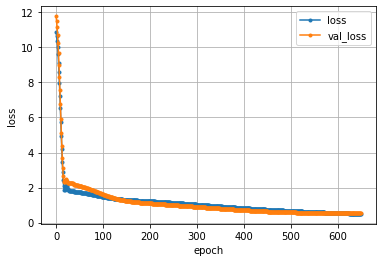

In [13]:
# 学習経過の可視化(大きさ)
loss     = history_size_array[0].history['loss']
val_loss = history_size_array[0].history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

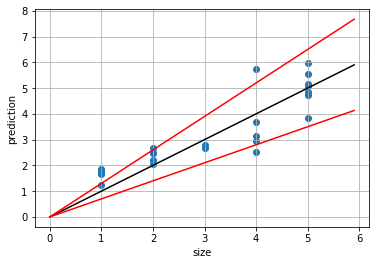

In [15]:
# 散布図表示(テストデータ25個)
size_predict = model_size_array[0].predict([x_size_test_array1[0], x_size_test_array2[0], x_size_test_array3[0]])
size_answer = y_size_test_array[0]

plt.scatter(size_answer, size_predict)
plt.xlabel("size")
plt.ylabel("prediction")
plt.grid(True)
## y=xの直線をひく
x = []
for i in range(60):
    x.append(i*0.1)
y = []
for i in range(60):
    y.append(i*0.1)
plt.plot(x, y, color='black')
## 誤差-30%の直線を引く
y = []
for i in range(60):
    y.append(i*0.1*0.7)
plt.plot(x, y, color='red')
## 誤差+30%の直線を引く
y = []
for i in range(60):
    y.append(i*0.1*1.3)
plt.plot(x, y, color='red')

In [16]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data1 = []
no_hole_data2 = []
no_hole_data3 = []
size_x_data = []
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
size_y_data = []
position_x_data = []
position_x_data1 = []
position_x_data2 = []
position_x_data3 = []
position_one_data1 = []
position_one_data2 = []
position_one_data3 = []
position_two_data1 = []
position_two_data2 = []
position_two_data3 = []
position_three_data1 = []
position_three_data2 = []
position_three_data3 = []
position_four_data1 = []
position_four_data2 = []
position_four_data3 = []
position_five_data1 = []
position_five_data2 = []
position_five_data3 = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]
        
#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_one_data1.append(data_array[3:1254])
    position_one_data2.append(data_array[1254:2505])
    position_one_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_two_data1.append(data_array[3:1254])
    position_two_data2.append(data_array[1254:2505])
    position_two_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_three_data1.append(data_array[3:1254])
    position_three_data2.append(data_array[1254:2505])
    position_three_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_four_data1.append(data_array[3:1254])
    position_four_data2.append(data_array[1254:2505])
    position_four_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_five_data1.append(data_array[3:1254])
    position_five_data2.append(data_array[1254:2505])
    position_five_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])

### 各配列をnp.array型にして各要素を型変換
no_hole_data1 = np.array(no_hole_data1, dtype=float)
no_hole_data2 = np.array(no_hole_data2, dtype=float)
no_hole_data3 = np.array(no_hole_data3, dtype=float)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data1 = np.array(position_x_data1, dtype=float)
position_x_data2 = np.array(position_x_data2, dtype=float)
position_x_data3 = np.array(position_x_data3, dtype=float)
position_one_data1 = np.array(position_one_data1, dtype=float)
position_two_data1 = np.array(position_two_data1, dtype=float)
position_three_data1 = np.array(position_three_data1, dtype=float)
position_four_data1 = np.array(position_four_data1, dtype=float)
position_five_data1 = np.array(position_five_data1, dtype=float)
position_one_data2 = np.array(position_one_data2, dtype=float)
position_two_data2 = np.array(position_two_data2, dtype=float)
position_three_data2 = np.array(position_three_data2, dtype=float)
position_four_data2 = np.array(position_four_data2, dtype=float)
position_five_data2 = np.array(position_five_data2, dtype=float)
position_one_data3 = np.array(position_one_data3, dtype=float)
position_two_data3 = np.array(position_two_data3, dtype=float)
position_three_data3 = np.array(position_three_data3, dtype=float)
position_four_data3 = np.array(position_four_data3, dtype=float)
position_five_data3 = np.array(position_five_data3, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

### データの加工
# 最大値で割る
max_displacement = size_x_data2.max()
size_x_data1 = size_x_data1/max_displacement
size_x_data2 = size_x_data2/max_displacement
size_x_data3 = size_x_data3/max_displacement
position_x_data1 = position_x_data1/max_displacement
position_x_data2 = position_x_data2/max_displacement
position_x_data3 = position_x_data3/max_displacement
position_one_data1 = position_one_data1/max_displacement
position_one_data2 = position_one_data2/max_displacement
position_one_data3 = position_one_data3/max_displacement
position_two_data1 = position_two_data1/max_displacement
position_two_data2 = position_two_data2/max_displacement
position_two_data3 = position_two_data3/max_displacement
position_three_data1 = position_three_data1/max_displacement
position_three_data2 = position_three_data2/max_displacement
position_three_data3 = position_three_data3/max_displacement
position_four_data1 = position_four_data1/max_displacement
position_four_data2 = position_four_data2/max_displacement
position_four_data3 = position_four_data3/max_displacement
position_five_data1 = position_five_data1/max_displacement
position_five_data2 = position_five_data2/max_displacement
position_five_data3 = position_five_data3/max_displacement

# 実験2:差をとると精度が向上するか
# size_x_data = (size_x_data-no_hole_data)
# position_x_data = (position_x_data-no_hole_data)

# position_one_data = (position_one_data-no_hole_data)
# position_two_data = (position_two_data-no_hole_data)
# position_three_data = (position_three_data-no_hole_data)
# position_four_data = (position_four_data-no_hole_data)
# position_five_data = (position_five_data-no_hole_data)
position_y_data = position_y_data/50

### train用とtest用に分割(9:1)
size_x_train1, size_x_test1, size_x_train2, size_x_test2, size_x_train3, size_x_test3, size_y_train, size_y_test = train_test_split(size_x_data1, size_x_data2, size_x_data3, size_y_data, test_size=0.10)
position_x_train1, position_x_test1, position_x_train2, position_x_test2, position_x_train3, position_x_test3, position_y_train, position_y_test = train_test_split(position_x_data1, position_x_data2, position_x_data3, position_y_data, test_size=0.10)


In [23]:
print(len(size_y_test))
print(len(size_x_test1))

270
270


In [19]:
# 散布図表示(テストデータ270個)
size_predict = model_size_array[0].predict([size_x_test1, size_x_test2, size_x_test3])
size_answer = size_y_test

plt.scatter(size_answer, size_predict)
plt.xlabel("size")
plt.ylabel("prediction")
plt.grid(True)
## y=xの直線をひく
x = []
for i in range(60):
    x.append(i*0.1)
y = []
for i in range(60):
    y.append(i*0.1)
plt.plot(x, y, color='black')
## 誤差-30%の直線を引く
y = []
for i in range(60):
    y.append(i*0.1*0.7)
plt.plot(x, y, color='red')
## 誤差+30%の直線を引く
y = []
for i in range(60):
    y.append(i*0.1*1.3)
plt.plot(x, y, color='red')

ValueError: in user code:

    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_20 is incompatible with the layer: expected axis -1 of input shape to have value 2016 but received input with shape [None, 60096]
